In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Variables

In [37]:
ticker = '^FTSE'
label = 'FTSE 100'
window = 5
timespan = 365

# Initial Data Gathering and Calculations

[*********************100%***********************]  1 of 1 completed


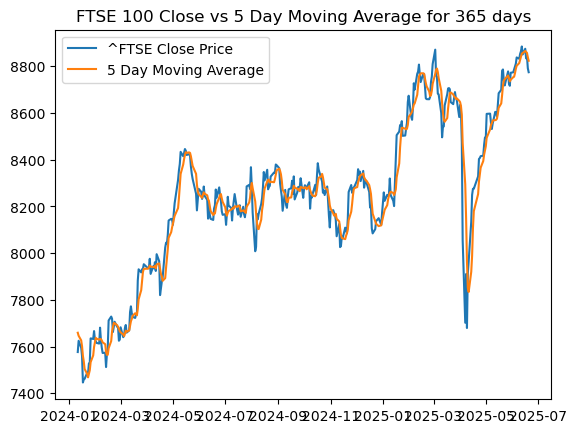

In [38]:
df = yf.download(ticker,  auto_adjust=True)
df['MovingAverage'] = df['Close'].rolling(window).mean()
df = df.iloc[-timespan:, :]

df = df.iloc[:, :]
plt.plot(df['Close'])
plt.plot(df['MovingAverage'])
plt.legend([f'{ticker} Close Price', f'{window} Day Moving Average'])
plt.title(f'{label} Close vs {window} Day Moving Average for {timespan} days');

# Creating a Strategy

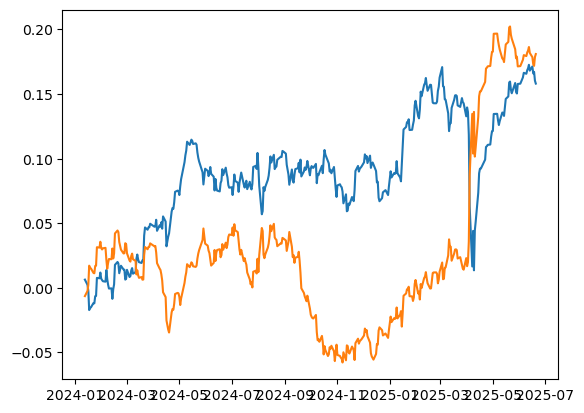

In [39]:
df.columns = df.columns.get_level_values(0)

def add_MovingAverage_Strategy(df):
    df['Strategy'] = np.where(df['Close'] > df['MovingAverage'],1,-1)
    return df

df = add_MovingAverage_Strategy(df)
df['asset_cumultative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) -1

plt.plot(df['asset_cumultative'])
plt.plot(df['strategy_cumulative'])

# Backtesting and Plotting the Strategy

[*********************100%***********************]  1 of 1 completed

^FTSE Buy & Hold Return: 15.81%
5-Day MA Strategy Return: 18.10%


Price,Close,High,Low,Open,Volume,MovingAverage,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
2024-01-11,7576.600098,7693.899902,7576.600098,7651.799805,1306895000,7659.240039,NaN,NaN,NaN
2024-01-12,7624.899902,7655.200195,7576.600098,7576.600098,794125500,7646.300000,-1.0,0.006375,-0.006375
2024-01-15,7594.899902,7637.799805,7578.299805,7624.899902,740769500,7626.439941,-1.0,0.002415,-0.002465
2024-01-16,7558.299805,7594.899902,7538.899902,7594.899902,1128049600,7601.299902,-1.0,-0.002415,0.002342
2024-01-17,7446.299805,7558.299805,7404.100098,7558.299805,838880100,7560.199902,-1.0,-0.017198,0.017195
...,...,...,...,...,...,...,...,...,...
2025-06-16,8875.200195,8902.400391,8850.599609,8850.599609,842787400,8865.640039,-1.0,0.171396,0.178586
2025-06-17,8834.000000,8875.200195,8809.900391,8875.200195,851103300,8861.820117,1.0,0.165958,0.173115
2025-06-18,8843.500000,8858.599609,8820.400391,8834.000000,657935000,8857.640039,-1.0,0.167212,0.171854


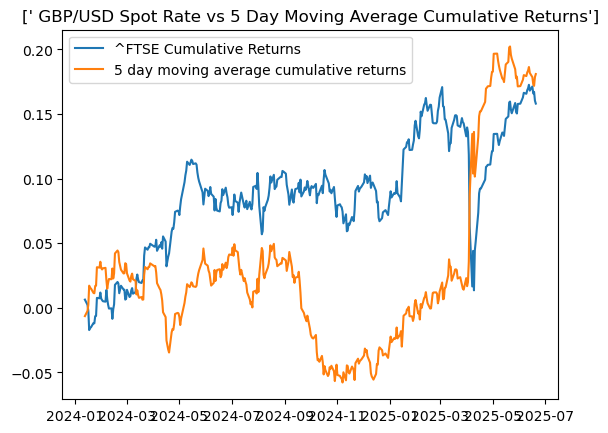

In [40]:
def get_data():
    df = yf.download(ticker, auto_adjust=True)
    df.columns = df.columns.get_level_values(0)
    df['MovingAverage'] = df['Close'].rolling(window).mean()
    df = df.iloc[-timespan:, :]
    return df


def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df['Close'] > df['MovingAverage'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df


def test_strategy(df): # Plot the returns
    df['asset_cumulative'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['strategy_cumulative'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1
    return df

def main_function():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

def plot_function(df):
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{ticker} Cumulative Returns',f'{window} day moving average cumulative returns'])
    plt.title([f' {label} Spot Rate vs {window} Day Moving Average Cumulative Returns'])
    return df

def return_summary(df):
    asset_return = df['asset_cumulative'].iloc[-1]*100
    strategy_return = df['strategy_cumulative'].iloc[-1]*100
    print(f"{ticker} Buy & Hold Return: {asset_return:.2f}%")
    print(f"{window}-Day MA Strategy Return: {strategy_return:.2f}%")


def run_all():
    df = main_function()
    df = test_strategy(df)
    df = plot_function(df)
    return_summary(df)
    return df

run_all()